## Python Implementation

In [131]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [9]:
df= pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


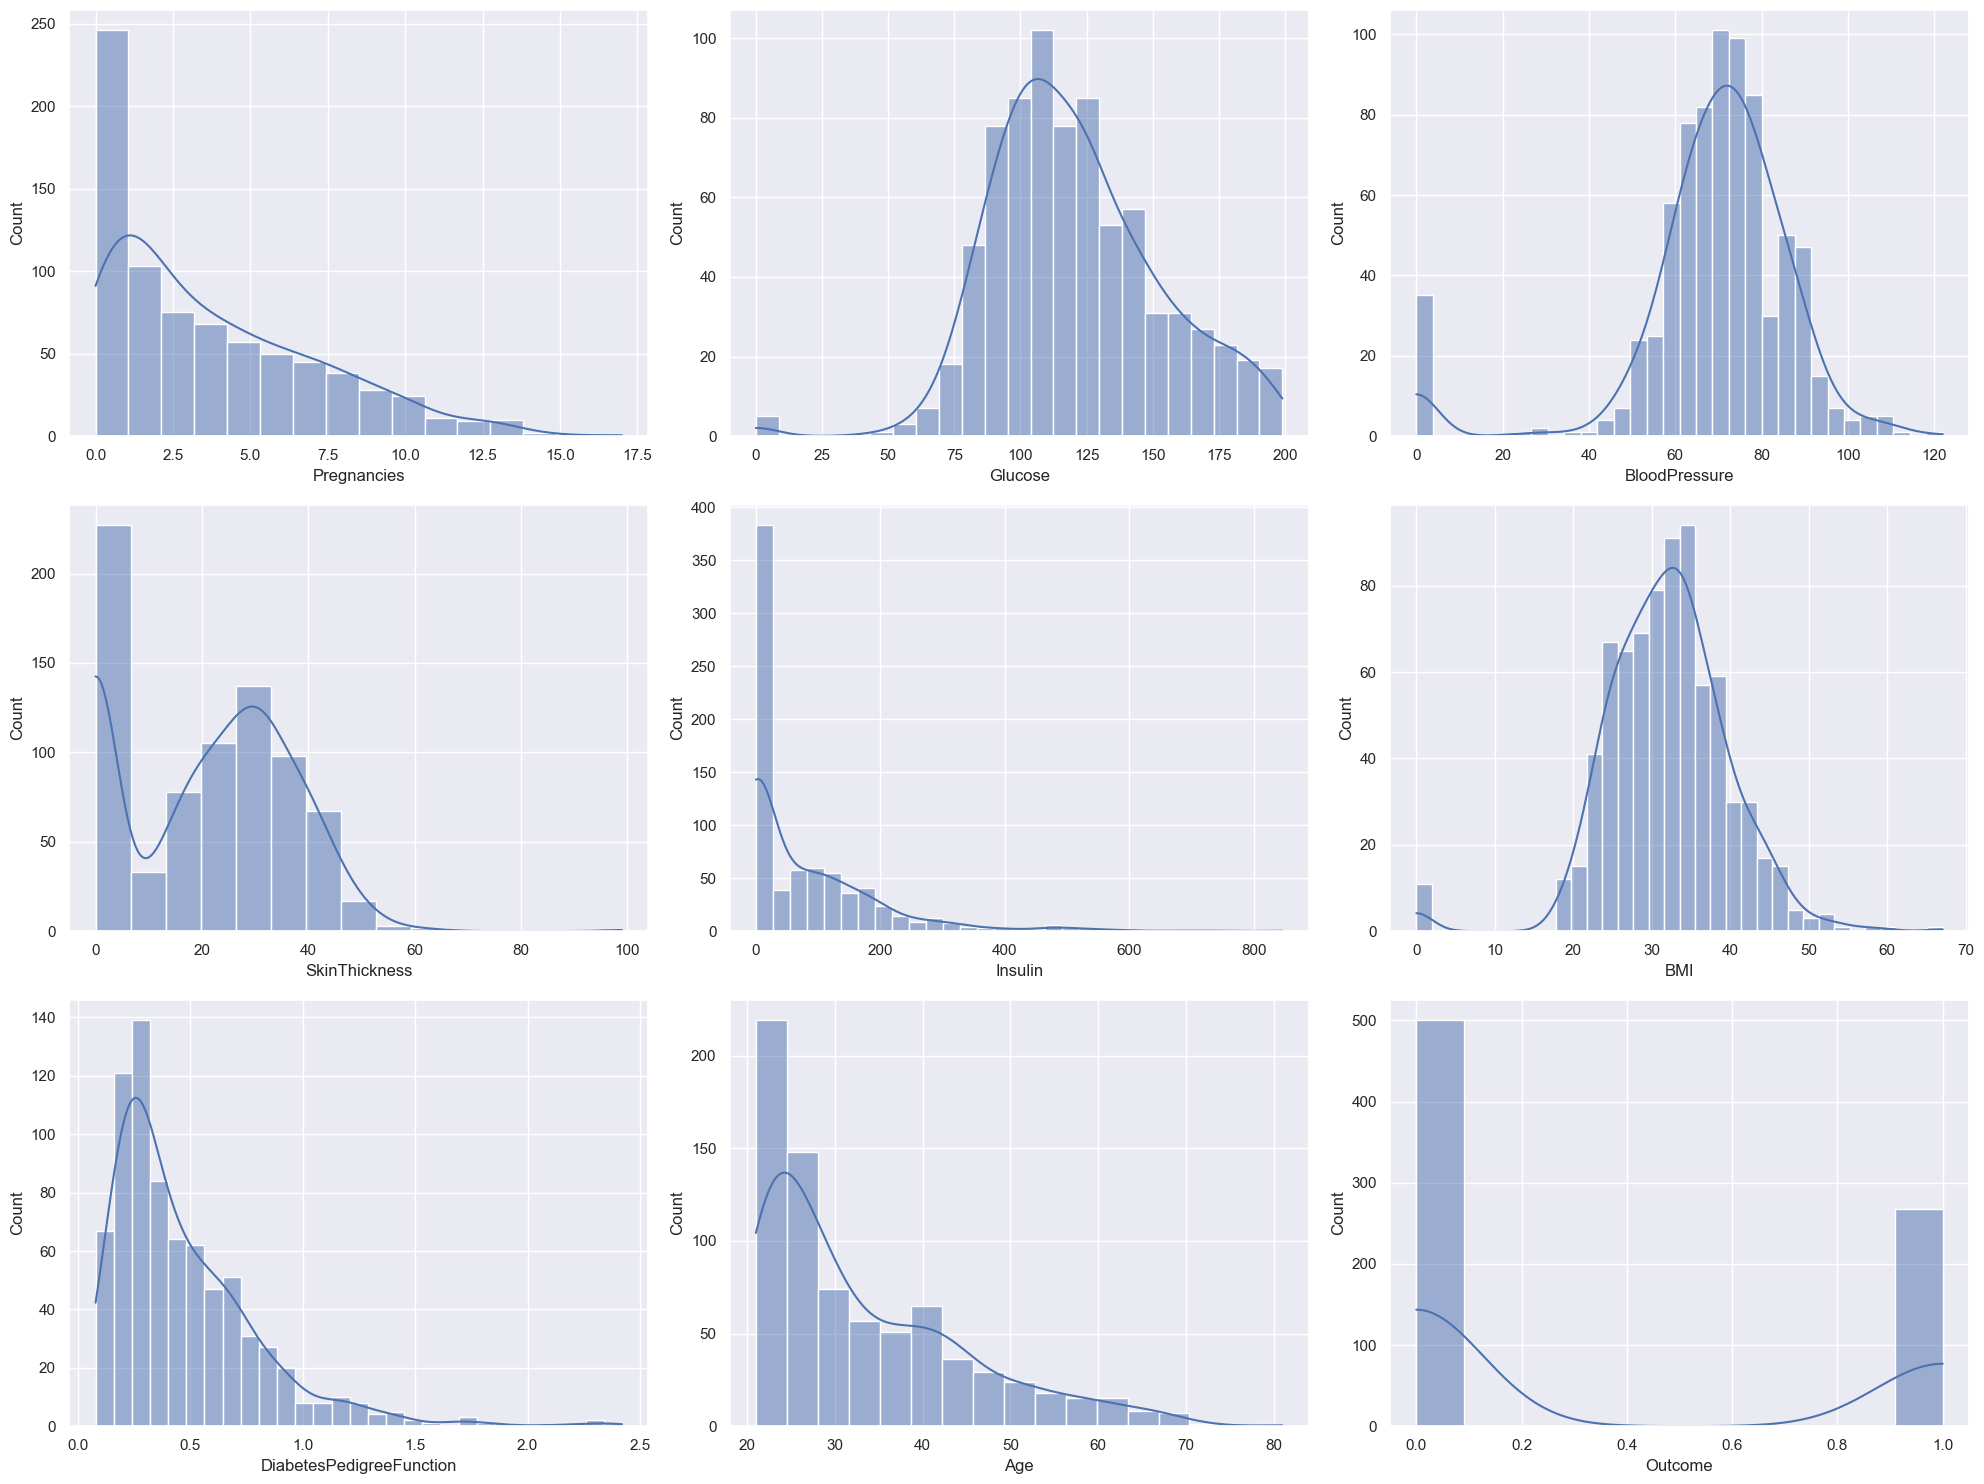

In [55]:
## Checking how data is distributed for each of the columns
index = 1
plt.figure(figsize = (20,15))
for i in df.columns:
    if index<=9:
        plt.subplot(3,3,index)
        sns.histplot(df[i],kde = True)
        plt.xlabel(i)
    index = index + 1
    plt.tight_layout()

## Observation
- There is  skewness in the data.
- We can see that for skin thickness, Insulin,BMI, Glucose, Blood Pressure there are values with zero which is not possible. 
  We can replace these values with mean.

In [67]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
## replacing zero values with the mean of the column
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [68]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

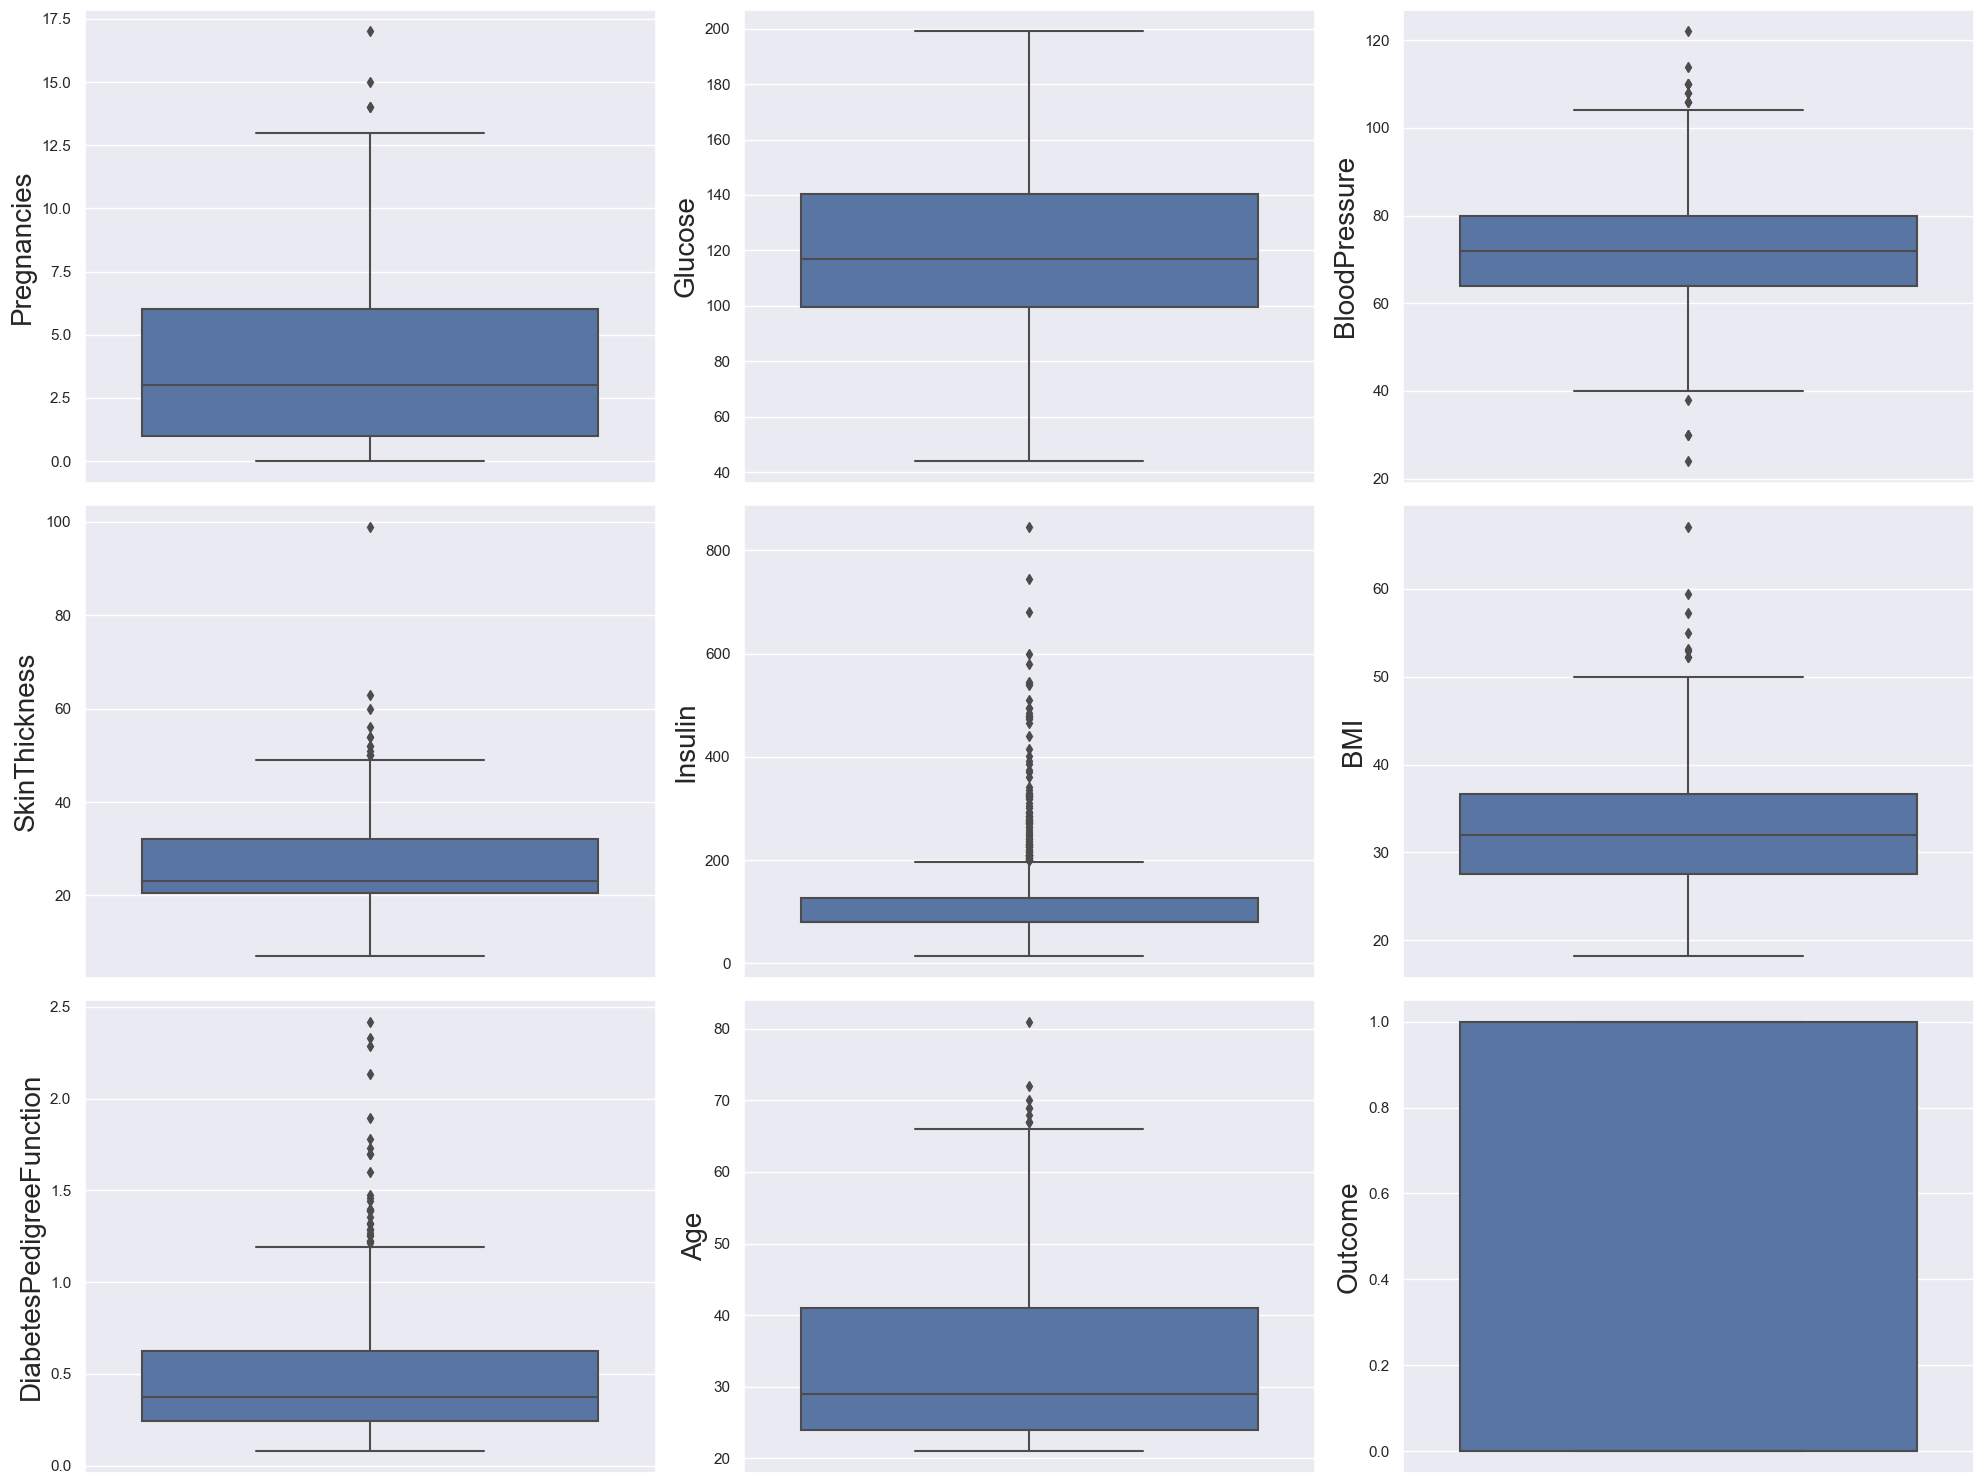

In [92]:
plt.figure(figsize = (20,15))
index = 1
for i in df:
    if index<=9:
        plt.subplot(3,3,index)
        sns.boxplot(data = df,y = i,orient = "v")
        plt.ylabel(i,fontsize=20)
    index = index +1
    plt.tight_layout()


In [94]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [95]:
# We can now deal with the outliers
# Removing the top 2 % data from the pregnancies column
q = df['Pregnancies'].quantile(0.98)
df_cleaned = df[df['Pregnancies']<q]
#Removing the top 1% data from the BMI column
q = df["BMI"].quantile(0.99)
df_cleaned = df[df['BMI']<q]
# Removing the top 1% data from the Skin Thickness column
q = df['SkinThickness'].quantile(0.99)
df_cleaned = df[df['SkinThickness']<q]
# Removing the top 5% data from insulin column
q = df['Insulin'].quantile(0.95)
df_cleaned = df[df['Insulin']<q]
# Removing the top 1 % data from DiabetesPedigreeFunction column
q = df['DiabetesPedigreeFunction'].quantile(0.99)
df_cleaned = df[df['DiabetesPedigreeFunction']<q]
# Removing the top 1% form the Age column
q = df['Age'].quantile(0.99)
df_cleaned = df[df['Age']<q]

In [96]:
df_cleaned.shape

(759, 9)

In [97]:
df.shape

(768, 9)

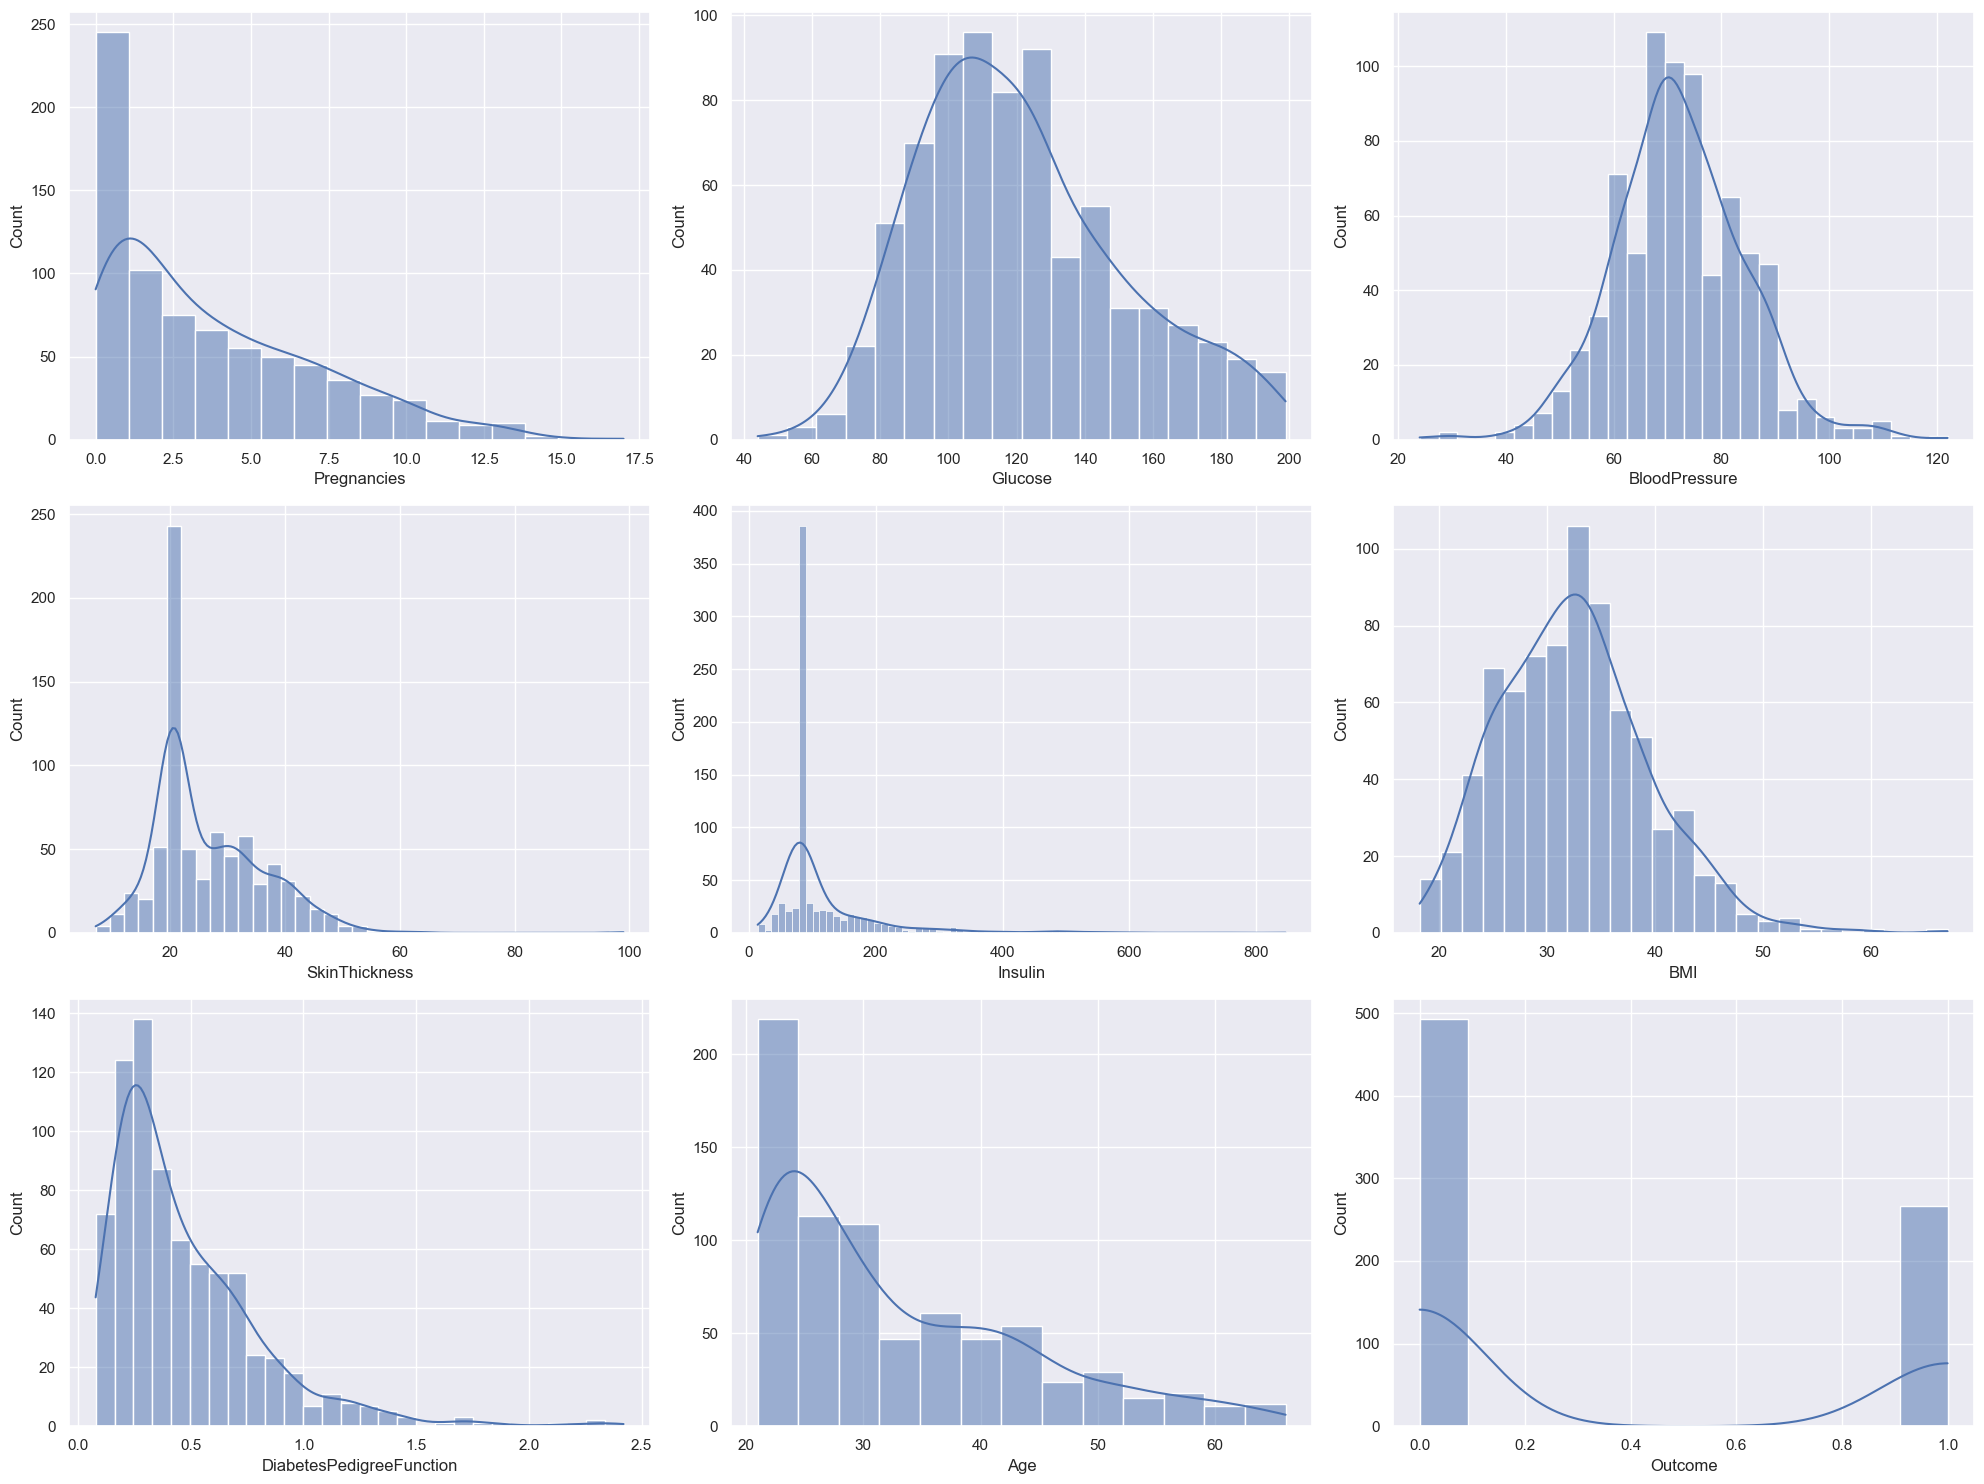

In [106]:
## We can check now how the data is distributed now among the columns
index = 1
plt.figure(figsize = (20,15))
for i in df_cleaned:
    if index<=9:
        plt.subplot(3,3,index)
        sns.histplot(data=df_cleaned,x= i,kde = True)
        plt.xlabel(i)
    index = index + 1
    plt.tight_layout()

<Axes: >

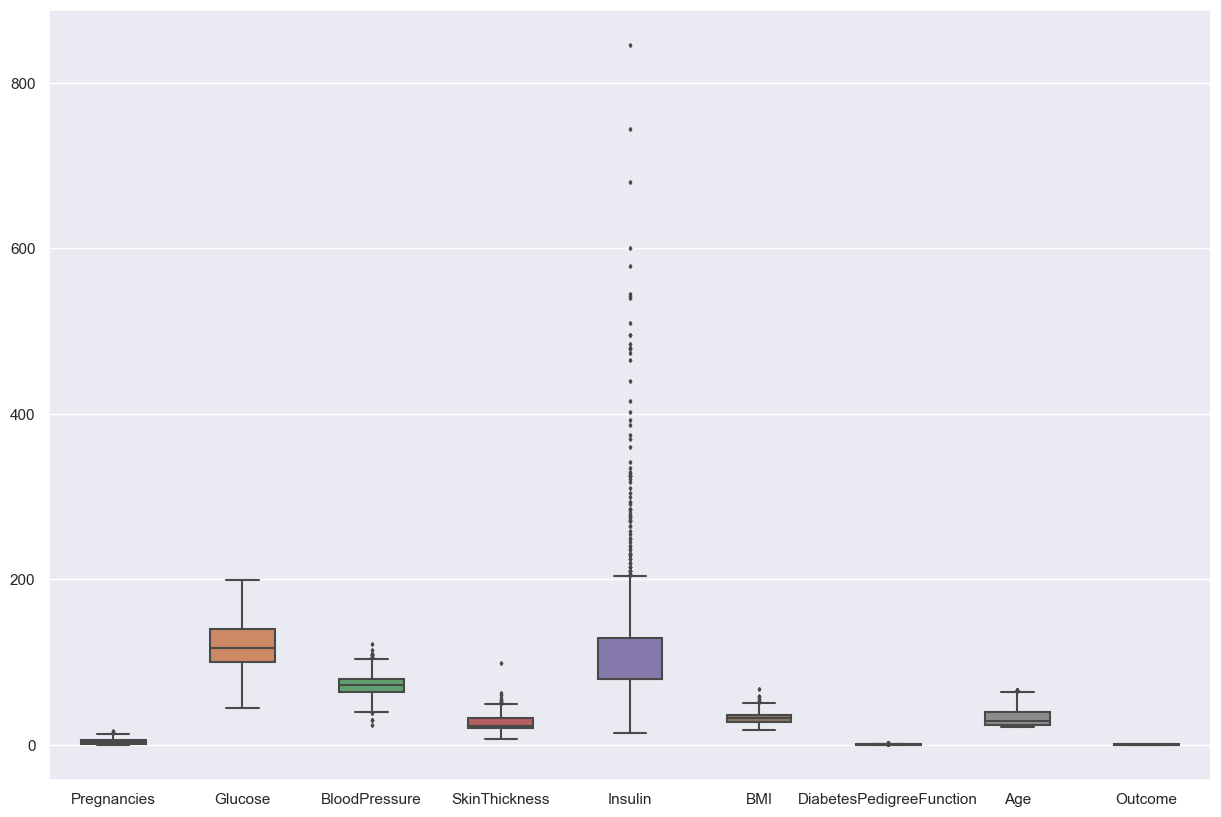

In [120]:
# We can also have a look at the outliers once more
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data =df_cleaned,ax = ax,width = 0.5,fliersize=2)

In [122]:
df_cleaned.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [123]:
# Let's build the model now
X = df_cleaned.drop("Outcome",axis = 1)
y = df_cleaned.Outcome

In [124]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [125]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 759, dtype: int64

### Lets visualize the relationship between our independent variables and the categories

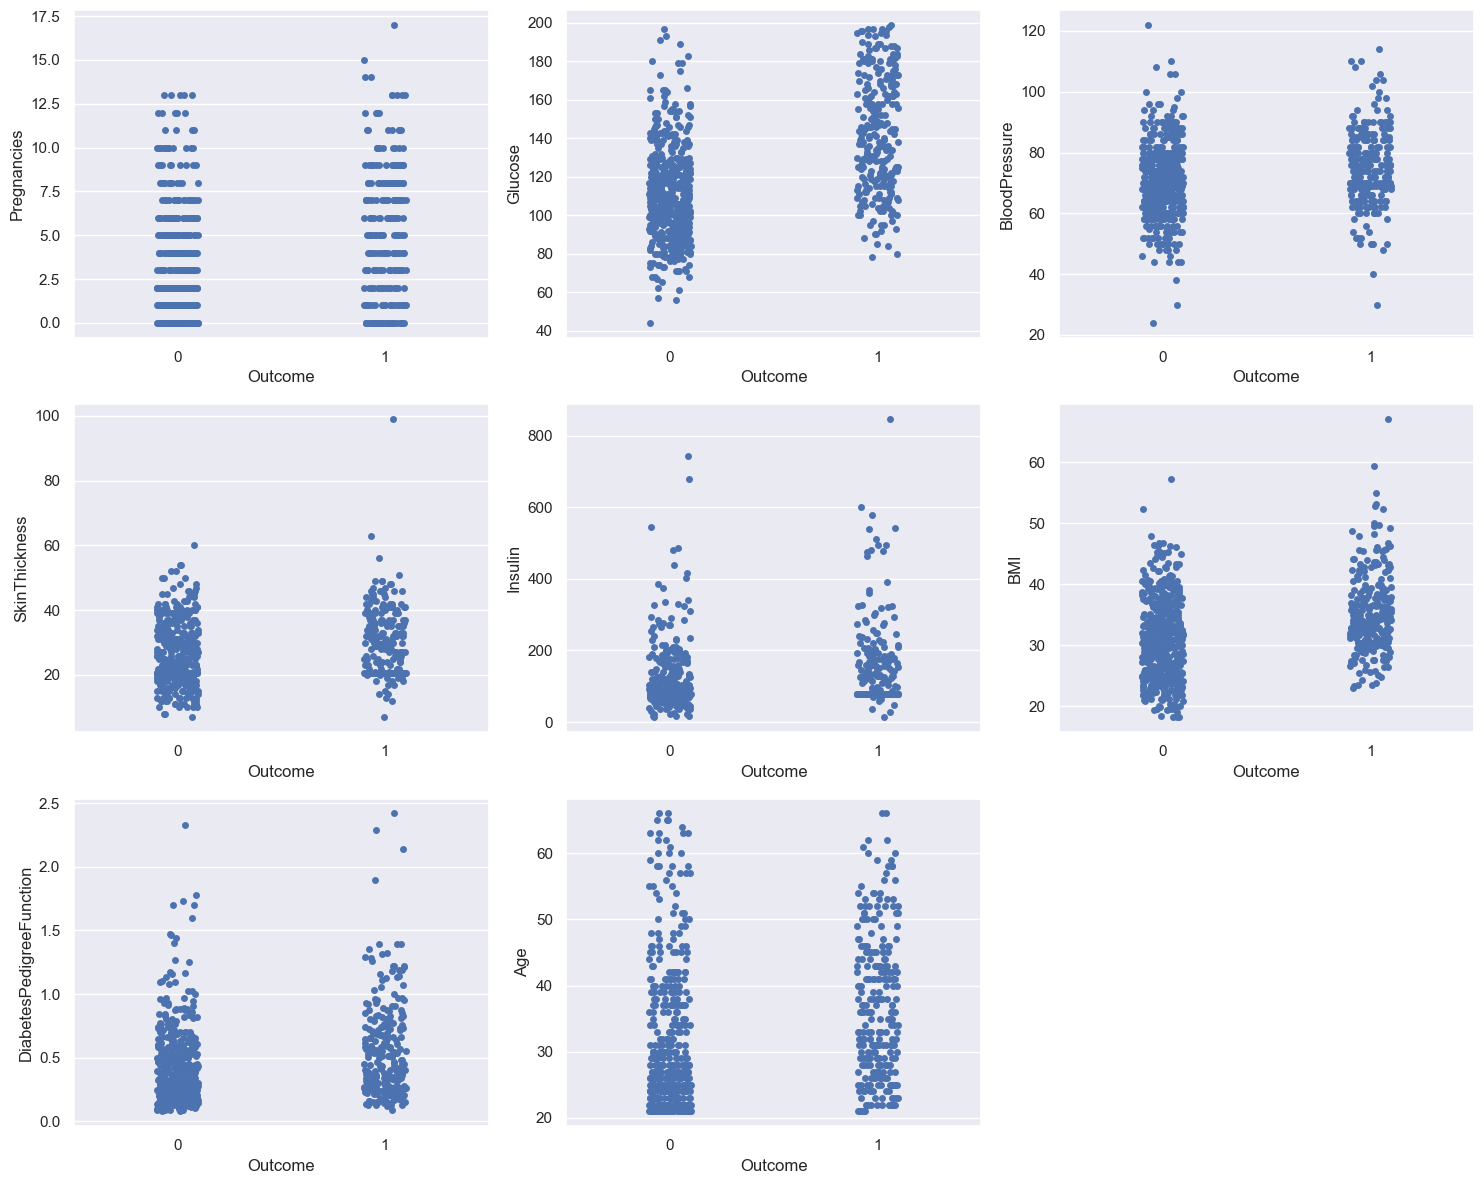

In [128]:
index = 1
plt.figure(figsize= (15,12))
for i in X:
    if index<= 9:
        plt.subplot(3,3,index)
        sns.stripplot(data=df_cleaned,x= y, y = i)
    index = index+1
    plt.tight_layout()

In [129]:
# scaling the data first
scalar=StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

In [130]:
## Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [132]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [133]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

## Confusion matrix 

In [134]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[106,  17],
       [ 28,  39]], dtype=int64)

In [135]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

## Accuracy score

In [136]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7631578947368421

In [137]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7631578947368421

## Precision

In [139]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8617886178861789

### Recall 

In [140]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7910447761194029

### F1 score

In [141]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8249027237354086

### Pickling 

In [143]:
import pickle
# Writing different model files to file
with open("modelForPrediction.pkl",'wb') as f:
    pickle.dump(log_reg,f)

In [144]:
with open("modelForPrediction.pkl","rb") as f:
    pickle.load(f)